In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/content/Churn_Modelling.csv")

In [ ]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.drop(columns=["CustomerId","Surname"],inplace=True) #Remove the column with string datatype

In [ ]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [ ]:
df = df.astype(int) # Change into numerical

In [ ]:
df.drop(columns=["RowNumber"],inplace=True)

In [ ]:
df


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0,2,1,0,96270,0,0,0,1
9996,516,35,10,57369,1,1,1,101699,0,0,0,1
9997,709,36,7,0,1,0,1,42085,1,0,0,0
9998,772,42,3,75075,2,1,0,92888,1,1,0,1


In [ ]:
X=df.drop(columns=["Exited"]) #Remove the target column , remaining will be input lable

In [ ]:
Y=df["Exited"] #Target column ,   Make it the output feature

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=1)  # Split into 80/20

In [ ]:
X_train.shape

(8000, 11)

In [ ]:
from sklearn.preprocessing import StandardScaler # Scaled the lables
scalar=StandardScaler()

X_train_Scaled = scalar.fit_transform(X_train)
X_test_Scaled = scalar.fit_transform(X_test)


In [ ]:
X_train_Scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [ ]:
# !pip install tensorflow

In [ ]:
import tensorflow
from tensorflow import keras
from  tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model=Sequential()
model.add(Dense(11,activation="relu",input_dim=11)) # layer1
model.add(Dense(5,activation="relu")) # layer2
model.add(Dense(1,activation="sigmoid")) # layer3-output layer

In [ ]:
  model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 11)                132       
                                                                 
 dense_4 (Dense)             (None, 5)                 60        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 198 (792.00 Byte)
Trainable params: 198 (792.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
  model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"]) # Compile the model

In [ ]:
history=model.fit(X_train_Scaled,y_train,epochs=50,validation_split=0.2) # Train the model

Epoch 1/50
200/200 [==============================] - 3s 7ms/step - loss: 0.5380 - accuracy: 0.7752 - val_loss: 0.4840 - val_accuracy: 0.8037
Epoch 2/50
200/200 [==============================] - 1s 4ms/step - loss: 0.4542 - accuracy: 0.8050 - val_loss: 0.4483 - val_accuracy: 0.8119
Epoch 3/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4363 - accuracy: 0.8089 - val_loss: 0.4362 - val_accuracy: 0.8100
Epoch 4/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4286 - accuracy: 0.8145 - val_loss: 0.4283 - val_accuracy: 0.8112
Epoch 5/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4222 - accuracy: 0.8188 - val_loss: 0.4208 - val_accuracy: 0.8156
Epoch 6/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4156 - accuracy: 0.8250 - val_loss: 0.4141 - val_accuracy: 0.8206
Epoch 7/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4081 - accuracy: 0.8298 - val_loss: 0.4047 - val_accuracy: 0.8256
Epoch 

In [ ]:
y_log=model.predict(X_test_Scaled) # Predict the output

63/63 [==============================] - 0s 2ms/step


In [ ]:
import numpy as np
y_predict = np.where(y_log>0.5,1,0) # As used sigmoid now place threshold for better understanding

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)  # Accuracy

0.8585

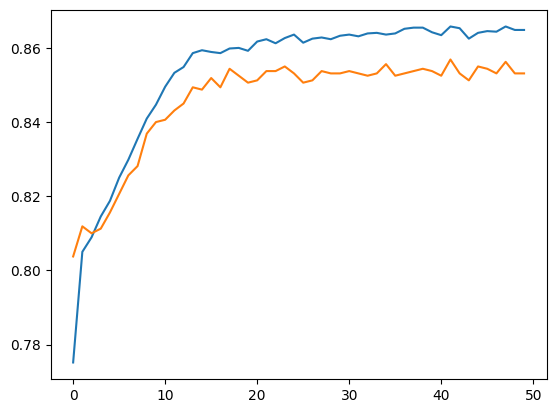

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

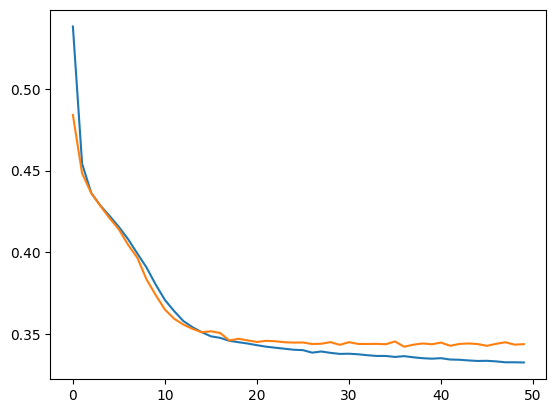

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])